In [11]:
""" Categorical data can be a little tricky,
    so sklearn implements a robust vectorization
    routine for string data.
"""
house_data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
X = vec.fit_transform(house_data)

In [12]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [15]:
""" Okay, the above method is easy to understand and it works.
    But it can easily grow huge, and I hate that.
"""
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(house_data)

import pandas as pd
pd.DataFrame(X, columns=vec.get_feature_names())

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


In [16]:
""" Text Features
    Okay, this seems like some pretty low-rent NLP to me, but
    I guess it is just showing how to use a SciPy tool that maybe
    I could use in some other (less contrived) context.
"""
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [17]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


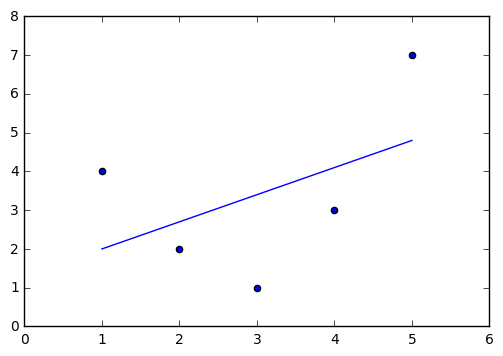

In [21]:
""" Derived Features

    Sometimes the data as-is will be too complicated to fit
    using the model we want, so we must first tranform the
    input data.
"""

""" Here we have some data points that fit poorly to a
    simple linear regression.
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

[[   1.    1.    1.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   5.   25.  125.]]


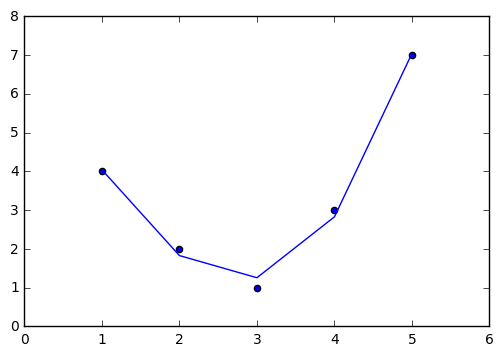

In [23]:
""" So, we can transform the inputs with a polynomial of order 3 first.
    And then the Linear Regression works pretty well.
"""
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

In [24]:
""" Also, imputing missing data is a type of input-feature engineering.

    Here is a dataset with some missing values:
"""
from numpy import nan

X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [25]:
""" There are clearly more advanced techniques possible here.
    BUT, again, it looks like SciPy has a few of the most simple
    things you could think of already implemented.
    
    Here we will use a mean.
"""
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

In [26]:
""" Feature Pipelines

    Lastly, the above processes can quickly become tedious.
    So we want to implement a pipeline with these 3 steps:
    
    1. Impute missing values using the mean
    2. Transform features to quadratic
    3. Fit a linear regression
"""
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [27]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]
